In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from analysis_support import *
from plots import *

# IMPORTANT: need to install package `cm-super-minimal` and `dvipng` for matplotlib Latex Output to work

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "font.size": 20,
    "axes.prop_cycle": plt.cycler('color', ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00'])})
#plt.style.use('seaborn-poster')
sys.path.append('.')
pd.set_option('display.max_columns', None)

In [2]:
instance_set = 'all'
instances = None
#instance_set = 'handcrafted'
#instances = [119, 160, 188, 192, 196, 250, 261, 263, 278, 287]

In [3]:
seeds = [1, 41, 83, 139, 181, 257, 307, 353, 401, 449]

In [4]:
file_pattern = f'classic.BARN-{instance_set}/*.classic.*.*/lazy_prm_classic.BARN.instance_*.json'
print(file_pattern)
# Halton results loading
results = collect_deterministic_results([file_pattern], instances, seeds)
classic_table = tabulate_deterministic_results(results)

classic.BARN-all/*.classic.*.*/lazy_prm_classic.BARN.instance_*.json
Found 96000 result files
Missing results: 0


In [5]:
file_pattern = f'bc.BARN-{instance_set}/*.*.*.*/lazy_prm_bc.BARN.instance_*.json'
print(file_pattern)
# Halton results loading
results = collect_deterministic_results([file_pattern], instances, seeds)
bnc_table = tabulate_deterministic_results(results)

bc.BARN-all/*.*.*.*/lazy_prm_bc.BARN.instance_*.json
Found 46267 result files
Missing results: 0


In [6]:
classic_configs, classic_tables = tabulate_results_by(classic_table, ('check_type','step_size','direction'))

[array(['polytrace', 'unknown'], dtype=object), array([3.0e-05, 1.6e-04, 8.0e-04, 4.0e-03, 2.0e-02, 1.0e-01, 5.0e-01]), array(['bk', 'gammell'], dtype=object)]
Tables generated: 28


In [7]:
bnc_configs, bnc_tables = tabulate_results_by(bnc_table, ('solver','no_good_type','direction'))

[array(['cp_sat', 'pulse'], dtype=object), array(['multi_edge', 'single_edge'], dtype=object), array(['bk', 'gammell'], dtype=object)]
Tables generated: 8


In [8]:
classic_coverage = {}
for v in classic_configs:
    if len(classic_tables[v]) > 0:
        classic_coverage[v] = coverage_over_time(select_valid_instances(classic_tables[v]))

In [9]:
relevant_bnc_tables = {v: bnc_tables[v] for v in bnc_configs if v[1] == 'multi_edge'}

In [10]:
bnc_coverage = {}
for key, table in relevant_bnc_tables.items():
    bnc_coverage[key] = coverage_over_time(select_valid_instances(table))

# Coverage comparison

('cp_sat', 'multi_edge', 'bk')
('pulse', 'multi_edge', 'bk')


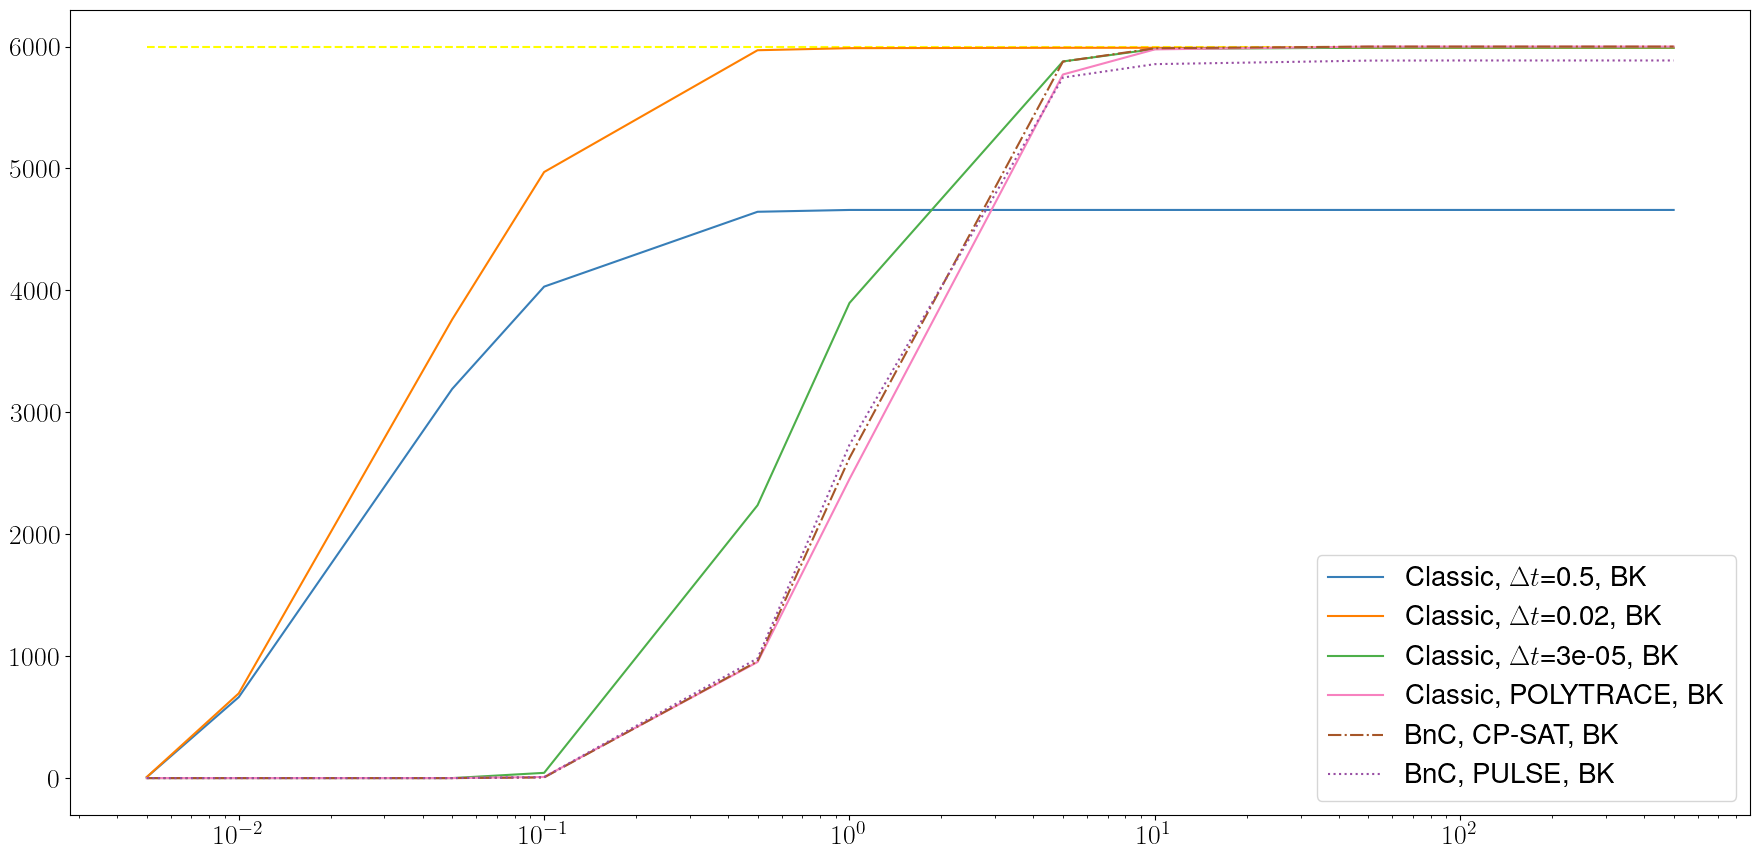

In [11]:
cmp_classic_configs = [('unknown', 0.5, 'bk'), ('unknown', 0.02, 'bk'), ('unknown', 3e-05, 'bk'), ('polytrace', 0.1, 'bk')]
bnc_configs = [('cp_sat', 'multi_edge', 'bk'), ('pulse', 'multi_edge', 'bk')]

plt.figure(figsize=(18, 9))
plt.plot([default_time_breakpoints[0], default_time_breakpoints[-1]], [6000, 6000], color='yellow', linestyle='--')

for v in cmp_classic_configs:
    label = 'Classic'
    if v[0] == 'polytrace':
        label += ', POLYTRACE, BK'
    else:
        label += ', $\Delta t$={}, BK'.format(v[1])
    plt.plot(default_time_breakpoints, classic_coverage[v], linestyle='-', label=label)

for bnc_config in bnc_configs:
    print(bnc_config)
    label = 'BnC'
    ls = '-.'
    if bnc_config[0] == 'cp_sat':
        label += ', CP-SAT'
    elif bnc_config[0] == 'pulse':
        label += ', PULSE'
        ls = ':'
    if bnc_config[2] == 'bk':
        label += ', BK'
    elif bnc_config[2] == 'gammell':
        label += ', Gammell'
    plt.plot(default_time_breakpoints, bnc_coverage[bnc_config], label=label, linestyle=ls)

#plt.title('Coverage of Lazy PRM configurations')
#plt.xlabel('Elapsed Time (s)')
plt.xscale('log')
#plt.ylabel('Valid Solutions')
plt.legend()
plt.tight_layout()
plt.show()

## Detailed comparison

In [12]:
classic_best = classic_tables[('polytrace', 0.1, 'bk')]

In [13]:
#bnc_best = bnc_tables[('cp_sat', 'multi_edge', 'gammell')]
bnc_best = bnc_tables[('cp_sat', 'multi_edge', 'bk')]

In [14]:
cmp_table = pd.merge(classic_best, bnc_best, on=('instance', 'seed', 'sequence'), suffixes=('.classic', '.bnc'))

In [15]:
cmp_table = cmp_table[cmp_table['rgg_V.bnc'] == cmp_table['rgg_V.classic']]

In [16]:
cmp_table.head()

,domain.classic,instance,seed,sequence,max_speed.classic,no_good_type.classic,solver.classic,direction.classic,check_type.classic,num_no_goods.classic,rgg_V.classic,rgg_E.classic,rgg_expansions.classic,rgg_dispersion.classic,elapsed_time.classic,plan_time.classic,verif_time.classic,iterations.classic,valid.classic,exact_verification_time.classic,step_size.classic,holonomic_cost_0.classic,holonomic_cost_k.classic,smooth_cost_0.classic,smooth_cost_k.classic,plan_length.classic,domain.bnc,max_speed.bnc,no_good_type.bnc,solver.bnc,direction.bnc,check_type.bnc,num_no_goods.bnc,rgg_V.bnc,rgg_E.bnc,rgg_expansions.bnc,rgg_dispersion.bnc,elapsed_time.bnc,plan_time.bnc,verif_time.bnc,iterations.bnc,valid.bnc,exact_verification_time.bnc,step_size.bnc,holonomic_cost_0.bnc,holonomic_cost_k.bnc,smooth_cost_0.bnc,smooth_cost_k.bnc,plan_length.bnc
0,BARN,instance_121,41,halton,None,single_edge,a_star,bk,polytrace,0,22,118,1,5.550095,0.334998,0.000380,0.318335,1,True,0.0,0.1,14.029372,14.029372,14.249198,14.249198,7,BARN,None,multi_edge,cp_sat,bk,polytrace,0,22,118,1,5.550095,0.423488,0.000331,0.391903,1,True,None,None,14.029372,14.029372,14.249198,14.249198,7
1,BARN,instance_063,353,halton,None,single_edge,a_star,bk,polytrace,0,22,158,1,6.332786,0.382850,0.000279,0.343359,1,True,0.0,0.1,10.743326,10.743326,10.930761,10.930761,4,BARN,None,multi_edge,cp_sat,bk,polytrace,0,22,158,1,6.332786,0.252872,0.000272,0.242729,1,True,None,None,10.743326,10.743326,10.930761,10.930761,4
3,BARN,instance_003,41,halton,None,single_edge,a_star,bk,polytrace,0,22,158,1,6.332786,0.370946,0.000256,0.363186,1,True,0.0,0.1,10.743326,10.743326,10.930761,10.930761,4,BARN,None,multi_edge,cp_sat,bk,polytrace,0,22,158,1,6.332786,0.440814,0.000280,0.422107,1,True,None,None,10.743326,10.743326,10.930761,10.930761,4
4,BARN,instance_054,83,halton,None,single_edge,a_star,bk,polytrace,0,22,164,1,5.150895,0.592446,0.000271,0.584946,1,True,0.0,0.1,10.435708,10.435708,11.149577,11.149577,5,BARN,None,multi_edge,cp_sat,bk,polytrace,0,22,164,1,5.150895,0.559072,0.000410,0.551328,1,True,None,None,10.435708,10.435708,11.149577,11.149577,5
5,BARN,instance_004,83,halton,None,single_edge,a_star,bk,polytrace,0,22,126,1,6.332786,1.122399,0.000276,1.075698,1,True,0.0,0.1,10.435708,10.435708,11.149577,11.149577,5,BARN,None,multi_edge,cp_sat,bk,polytrace,0,22,126,1,6.332786,0.764563,0.000246,0.753249,1,True,None,None,10.435708,10.435708,11.149577,11.149577,5


In [17]:
len(cmp_table)

3579

### Plan costs

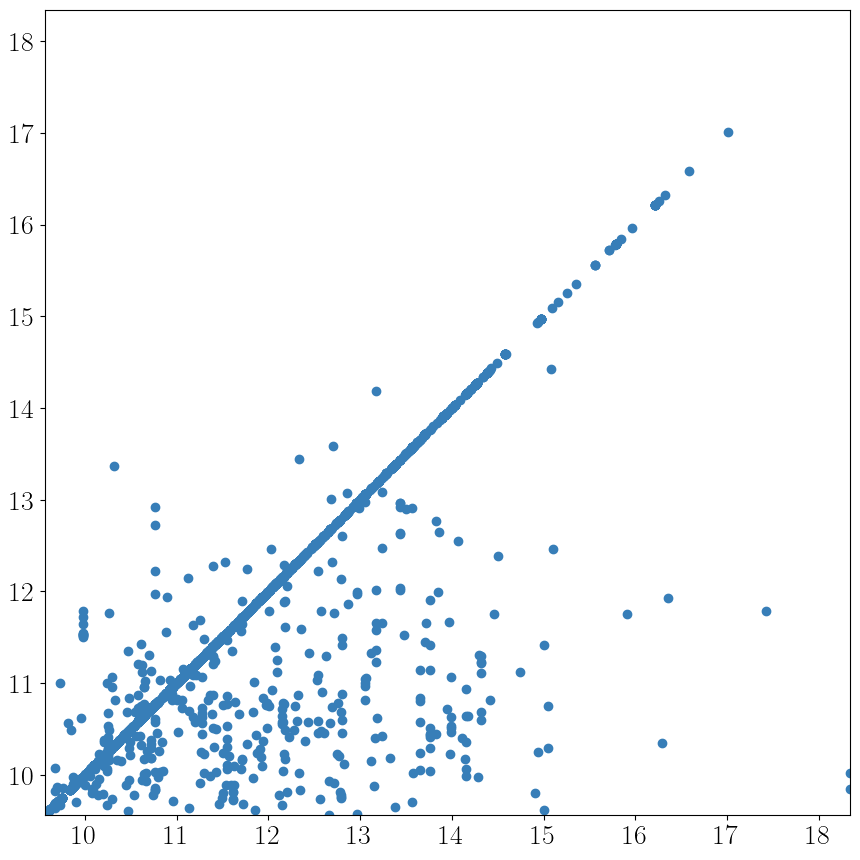

In [18]:
x = cmp_table['smooth_cost_k.classic'].values
y = cmp_table['smooth_cost_k.bnc'].values

lin_model = compare_with_scatter_chart(x, y, title='Smooth cost comparison', x_name='Classic, POLYTRACE, BK', y_name='BnC, CP-SAT, BK', paper=True)

In [19]:
print(lin_model)

LinregressResult(slope=0.8336242700798315, intercept=1.7947142174175301, rvalue=0.8713187591727227, pvalue=0.0, stderr=0.007849921637083005, intercept_stderr=0.09130230945732512)


In [20]:
compare_sequences(x, y)

,relation,x R y
0,<,81
1,=,3176
2,>,322


## Plan Length

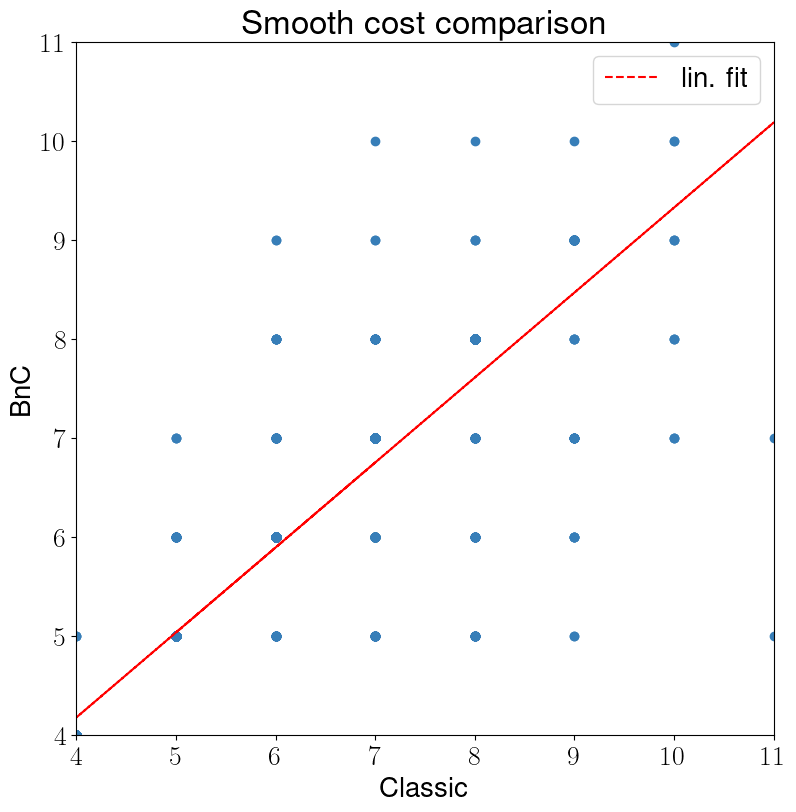

In [21]:
x = cmp_table['plan_length.classic'].values
y = cmp_table['plan_length.bnc'].values

lin_model = compare_with_scatter_chart(x, y, title='Smooth cost comparison', x_name='Classic', y_name='BnC')

In [22]:
print(lin_model)

LinregressResult(slope=0.8585981836788275, intercept=0.7472715822320897, rvalue=0.9110891525815652, pvalue=0.0, stderr=0.00649512431657222, intercept_stderr=0.03792143419942765)


### Graph size

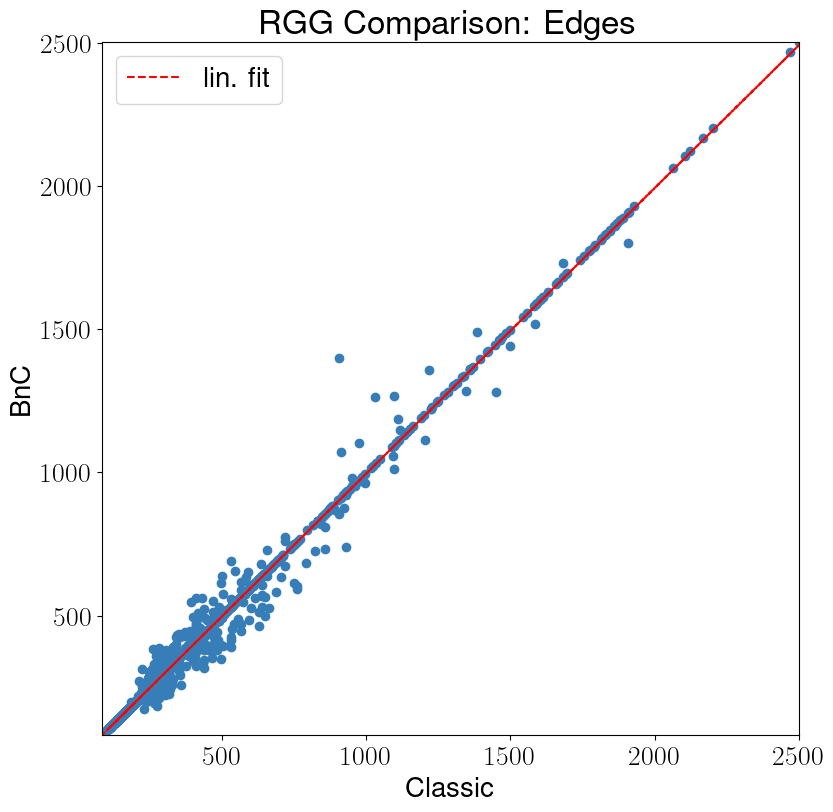

In [23]:
x = cmp_table['rgg_E.classic'].values
y = cmp_table['rgg_E.bnc'].values

lin_model = compare_with_scatter_chart(x, y, title='RGG Comparison: Edges', x_name='Classic', y_name='BnC')

In [24]:
print(lin_model)

LinregressResult(slope=0.9964724745123459, intercept=0.23716557472005206, rvalue=0.9966923155392067, pvalue=0.0, stderr=0.001358508426271857, intercept_stderr=0.5029737734650678)


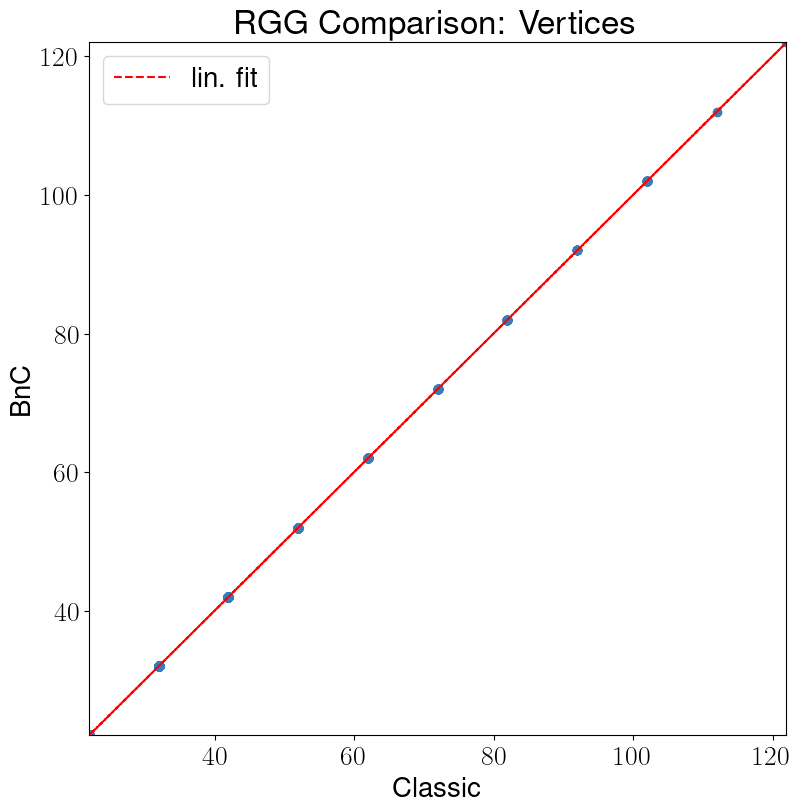

In [25]:
x = cmp_table['rgg_V.classic'].values
y = cmp_table['rgg_V.bnc'].values

lin_model = compare_with_scatter_chart(x, y, title='RGG Comparison: Vertices', x_name='Classic', y_name='BnC')

In [26]:
print(lin_model)

LinregressResult(slope=1.0, intercept=0.0, rvalue=1.0, pvalue=0.0, stderr=0.0, intercept_stderr=0.0)


### Runtime

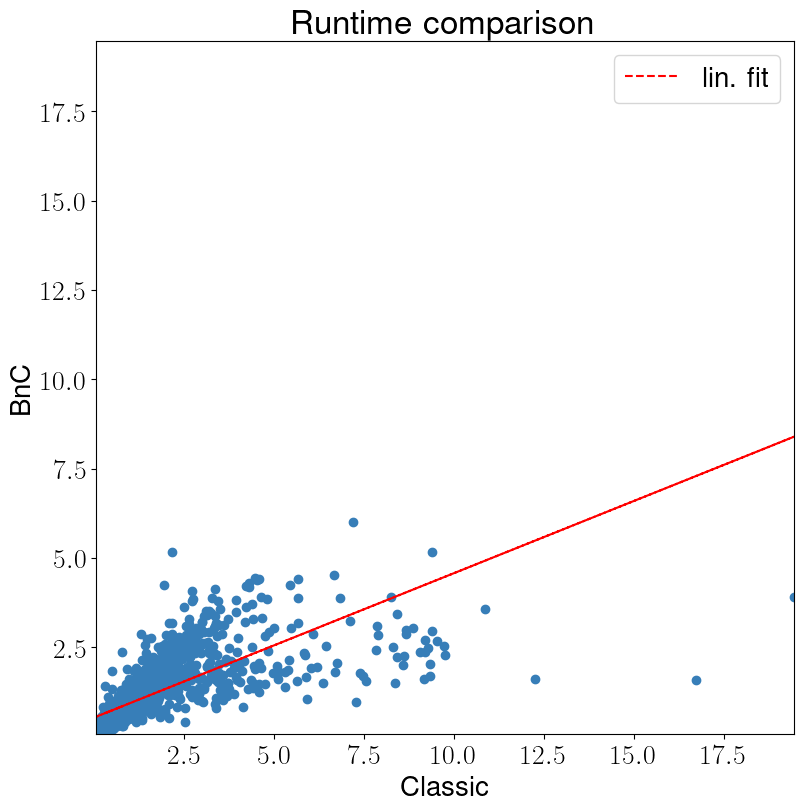

In [27]:
x = cmp_table['elapsed_time.classic'].values
y = cmp_table['elapsed_time.bnc'].values

lin_model = compare_with_scatter_chart(x, y, title='Runtime comparison', x_name='Classic', y_name='BnC')

In [28]:
print(lin_model)

LinregressResult(slope=0.40384157647639213, intercept=0.5395684052747621, rvalue=0.7213307500890827, pvalue=0.0, stderr=0.006483265394786279, intercept_stderr=0.010799148989452756)
